In [1]:
import requests
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline
from nssstats.plots import qq_plot

#import scipy.stats as stats
#from statsmodels.stats.proportion import proportion_confint


In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=1900-01-01&endtime=2020-10-22&minlatitude=34.9884&maxlatitude=36.6871&minlongitude=-90.3131&maxlongitude=-81.6518'

In [3]:
u = requests.get(url)

In [4]:
print(u.text[:1000])

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2020-10-21T21:49:45.720Z,36.0705,-89.8023333,6.84,2.14,md,46,40,0.0643,0.1,nm,nm60312762,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31,reviewed,nm,nm
2020-10-21T20:28:42.930Z,36.525,-89.5691667,6.85,1.69,md,19,50,0.02596,0.03,nm,nm60312752,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12,reviewed,nm,nm
2020-10-21T04:55:51.350Z,36.5456667,-89.649,8.01,1.61,md,24,44,0.02245,0.04,nm,nm60312697,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.4,0.147,21,reviewed,nm,nm
2020-10-21T03:00:08.800Z,36.3136667,-89.5361667,9.5,1.23,md,17,65,0.02693,0.06,nm,nm60312692,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10,reviewed,nm,nm
2020-10-20T18:50:21.800Z,36.2675,-89.5233333,8.84,2.33,md,46,33,0.0152,0.11

In [5]:
type(u)

requests.models.Response

In [6]:
u.status_code

200

In [7]:
usgs = pd.read_csv(StringIO(u.text))

In [8]:
#usgs = pd.read_csv(r.url, header=None, sep='\n')
#usgs = usgs[0].str.split(',', expand=True)
usgs = pd.read_csv(u.url)
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-10-21T21:49:45.720Z,36.070500,-89.802333,6.84,2.14,md,46.0,40.0,0.06430,0.10,...,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31.0,reviewed,nm,nm
1,2020-10-21T20:28:42.930Z,36.525000,-89.569167,6.85,1.69,md,19.0,50.0,0.02596,0.03,...,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12.0,reviewed,nm,nm
2,2020-10-21T04:55:51.350Z,36.545667,-89.649000,8.01,1.61,md,24.0,44.0,0.02245,0.04,...,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.40,0.147,21.0,reviewed,nm,nm
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,...,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,...,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm


In [9]:
usgs.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9158,1916-02-21T23:39:00.000Z,35.5,-82.5,NaN,5.2,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,North Carolina,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9159,1915-12-07T18:40:00.000Z,36.0,-90.0,NaN,4.5,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Arkansas,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
9160,1913-03-28T21:50:00.000Z,36.2,-83.7,NaN,4.1,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9161,1903-11-04T19:14:00.000Z,36.5,-89.8,NaN,5.1,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Missouri,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9162,1903-11-04T18:18:00.000Z,36.5,-89.5,NaN,4.6,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [10]:
usgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9163 non-null   object 
 1   latitude         9163 non-null   float64
 2   longitude        9163 non-null   float64
 3   depth            9150 non-null   float64
 4   mag              9160 non-null   float64
 5   magType          9152 non-null   object 
 6   nst              6155 non-null   float64
 7   gap              6153 non-null   float64
 8   dmin             5979 non-null   float64
 9   rms              6164 non-null   float64
 10  net              9163 non-null   object 
 11  id               9163 non-null   object 
 12  updated          9163 non-null   object 
 13  place            9163 non-null   object 
 14  type             9163 non-null   object 
 15  horizontalError  6214 non-null   float64
 16  depthError       6213 non-null   float64
 17  magError      

In [11]:
# Find all of the earthquakes specific to Tennessee
usgs[usgs['place'].str.contains('(Tennessee)')]
usgs_tn = usgs[usgs['place'].str.contains('(Tennessee)')]
usgs_tn

C:\Users\daily\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,...,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,...,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm
7,2020-10-19T20:19:38.490Z,36.224000,-82.817167,17.27,2.31,md,8.0,70.0,0.17510,0.12,...,2020-10-23T06:52:55.336Z,"6 km N of Greeneville, Tennessee",earthquake,0.91,1.69,0.099,6.0,reviewed,se,se
8,2020-10-19T05:15:25.090Z,36.209500,-89.476167,6.33,1.59,md,16.0,59.0,0.04374,0.05,...,2020-10-19T13:03:45.780Z,"6 km S of Ridgely, Tennessee",earthquake,0.26,0.56,0.086,14.0,reviewed,nm,nm
10,2020-10-17T07:12:44.060Z,35.366833,-85.213500,17.99,2.26,md,16.0,59.0,0.15870,0.14,...,2020-10-17T13:54:48.250Z,"4 km NNW of Flat Top Mountain, Tennessee",earthquake,0.33,0.60,0.152,15.0,reviewed,se,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,1952-07-16T23:48:10.000Z,36.200000,-89.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
9153,1928-11-03T04:02:50.200Z,36.112000,-82.828000,5.00,4.50,lg,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,dg
9156,1918-10-16T02:15:00.000Z,36.000000,-89.200000,NaN,4.50,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sg
9160,1913-03-28T21:50:00.000Z,36.200000,-83.700000,NaN,4.10,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [12]:
usgs_tn.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,4755.000000,4755.000000,4749.000000,4753.000000,3520.000000,3518.000000,3429.000000,3528.000000,3560.000000,3559.000000,3506.000000,3519.000000
mean,36.148204,-88.385203,8.602746,1.653404,14.655114,93.231950,0.064863,0.075771,0.935037,1.894777,0.146278,6.823245
std,0.318916,2.132069,4.556980,0.519565,8.687582,46.951008,0.068305,0.072726,2.490046,3.271671,0.141483,6.272703
min,34.994667,-90.073167,0.000000,0.000000,0.000000,21.000000,0.001070,0.000000,0.110000,0.100000,0.001000,0.000000
25%,36.135667,-89.518417,5.700000,1.300000,9.000000,59.000000,0.027340,0.040000,0.370000,0.650000,0.056000,3.000000
50%,36.260000,-89.469000,7.670000,1.600000,12.000000,82.000000,0.041180,0.060000,0.600000,1.100000,0.104000,5.000000
75%,36.320500,-89.384000,9.850000,1.900000,19.000000,112.750000,0.067380,0.090000,1.100000,2.200000,0.169000,8.000000
max,36.638000,-81.717667,37.300000,4.700000,89.000000,343.000000,0.695000,1.000000,99.000000,99.000000,0.950000,70.000000


4,755 earthquakes since 1900 in Tennessee (when filtered to the long/lat & occurences of 'Tennessee' in 'place' column).  Average magnitude 1.65 with highest being 4.7.  

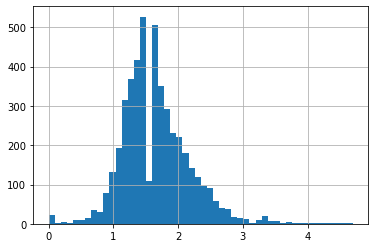

In [13]:
#look at histogram of magnitude
usgs_tn['mag'].hist(bins = 50);

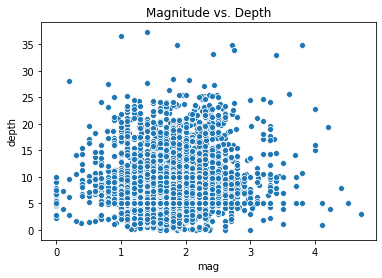

In [14]:
sns.scatterplot(data = usgs_tn, x = 'mag', y = 'depth')
plt.title('Magnitude vs. Depth');
plt.show()

There does not appear to be any correlation between magnitude & depth.  

In [15]:
usgs_tn[['mag', 'depth']].corr()

,mag,depth
mag,1.000000,0.153033
depth,0.153033,1.000000


In [16]:
usgs_tn.sort_values('depth', ascending = True).head(50)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1887,2016-06-22T16:20:17.250Z,36.474500,-82.571333,0.00,1.87,md,9.0,148.0,0.200700,0.13,...,2016-06-23T15:10:50.600Z,"6km W of Colonial Heights, Tennessee",quarry blast,0.46,0.79,0.117,6.0,reviewed,se,se
5630,2001-04-13T16:36:20.790Z,36.530000,-83.340000,0.00,3.00,md,16.0,NaN,NaN,NaN,...,2014-11-07T01:12:34.545Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,tva,tva
3120,2012-08-10T04:51:49.770Z,36.369000,-83.546667,0.00,1.60,md,15.0,85.0,0.070790,0.22,...,2016-04-07T20:00:04.710Z,"9km SSE of New Tazewell, Tennessee",earthquake,1.40,7.70,0.061,2.0,reviewed,se,se
5552,2001-07-08T03:05:11.100Z,35.880000,-86.800000,0.00,2.60,md,10.0,NaN,NaN,NaN,...,2014-11-07T01:13:15.794Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,tva,tva
8854,1976-01-03T16:10:46.300Z,36.440000,-89.520000,0.00,1.70,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:03:18.730Z,"8km NNW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
750,2019-03-15T07:53:07.010Z,35.676333,-84.229500,0.02,2.16,md,8.0,102.0,0.026560,0.43,...,2019-03-15T13:30:57.450Z,"5km WNW of Greenback, Tennessee",earthquake,1.21,10.87,0.058,5.0,reviewed,se,se
1094,2018-08-03T16:57:13.650Z,35.741333,-83.989167,0.04,2.36,md,13.0,134.0,0.182000,0.25,...,2018-12-12T09:35:04.526Z,"2km SW of Maryville, Tennessee",earthquake,0.83,4.86,0.056,10.0,reviewed,se,se
1557,2017-04-20T23:17:22.790Z,36.238167,-89.429167,0.08,1.15,md,5.0,184.0,0.010650,0.05,...,2017-04-24T14:15:11.100Z,"5km ESE of Ridgely, Tennessee",earthquake,0.67,0.12,0.073,4.0,reviewed,nm,nm
771,2019-02-28T15:27:35.560Z,35.700667,-84.239833,0.10,2.31,md,13.0,108.0,0.043860,0.32,...,2019-02-28T19:01:50.207Z,"7km NW of Greenback, Tennessee",earthquake,0.85,4.93,0.048,7.0,reviewed,se,se
7523,1983-10-15T05:04:49.750Z,36.467000,-89.552000,0.10,2.10,md,NaN,NaN,NaN,NaN,...,2016-04-14T15:55:52.110Z,"12km NW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm


In [17]:
usgs_tn.place.nunique()

1303

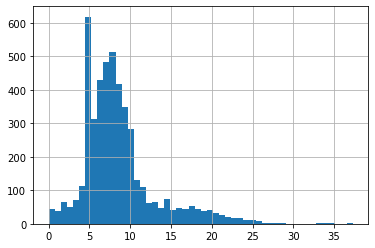

In [18]:
#look at histogram of depth
usgs_tn['depth'].hist(bins = 50);

Next:  suggest a geospatial view of the locations and any correlation between mag and/or depth.  Also a histogram of events over time

Use Stats Notebook 3 to apply logarithm to the 'depth' column

In [19]:
usgs_tn.mag.describe()

count    4753.000000
mean        1.653404
std         0.519565
min         0.000000
25%         1.300000
50%         1.600000
75%         1.900000
max         4.700000
Name: mag, dtype: float64

In [20]:
usgs_tn.mag

3       1.23
4       2.33
7       2.31
8       1.59
10      2.26
        ... 
9151     NaN
9153    4.50
9156    4.50
9160    4.10
9162    4.60
Name: mag, Length: 4755, dtype: float64

In [26]:
usgs_tn.mag.describe()

count    4753.000000
mean        1.653404
std         0.519565
min         0.000000
25%         1.300000
50%         1.600000
75%         1.900000
max         4.700000
Name: mag, dtype: float64

In [27]:
usgs_tn.mag.unique()

array([1.23, 2.33, 2.31, 1.59, 2.26, 1.25, 2.06, 1.33, 1.45, 1.39, 1.13,
       1.36, 2.3 , 1.26, 1.38, 0.97, 1.96, 1.31, 2.47, 2.1 , 1.6 , 1.64,
       1.73, 2.03, 1.78, 2.4 , 1.98, 1.99, 1.15, 2.44, 1.27, 1.28, 1.2 ,
       1.93, 1.55, 1.18, 1.58, 2.02, 1.1 , 1.51, 1.9 , 1.32, 2.61, 2.43,
       1.21, 2.08, 1.95, 2.17, 1.54, 0.96, 2.  , 1.35, 1.3 , 1.65, 0.79,
       1.16, 1.14, 2.53, 0.74, 1.68, 1.82, 1.47, 1.12, 1.19, 1.29, 1.88,
       1.17, 1.77, 1.72, 1.61, 2.14, 1.  , 1.94, 2.05, 1.44, 1.97, 1.81,
       1.84, 1.48, 2.25, 2.36, 1.53, 2.78, 3.13, 2.18, 2.5 , 1.76, 2.34,
       2.38, 1.43, 2.74, 2.29, 1.49, 2.73, 2.23, 1.24, 1.22, 1.52, 1.62,
       1.03, 1.5 , 1.42, 0.9 , 1.8 , 1.74, 1.46, 1.87, 0.86, 2.01, 2.72,
       1.57, 1.7 , 1.67, 1.34, 1.69, 1.92, 2.42, 3.8 , 2.75, 1.4 , 2.51,
       2.52, 1.86, 2.22, 2.2 , 2.28, 1.07, 1.09, 1.56, 1.37, 0.98, 1.08,
       1.66, 0.88, 1.06, 2.07, 2.7 , 2.37, 1.79, 2.35, 1.75, 1.71, 2.11,
       1.02, 1.91, 2.09, 2.16, 2.41, 2.6 , 2.15, 2.

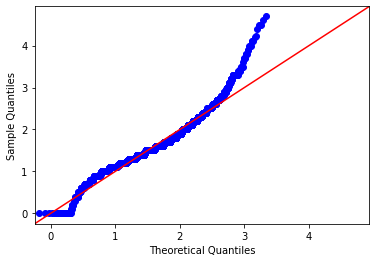

In [28]:
qq_plot(usgs_tn.mag)

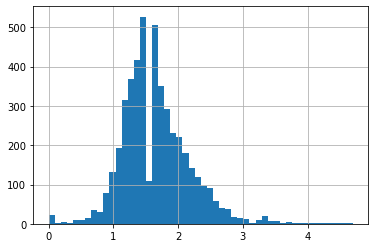

In [29]:
usgs_tn.mag.hist(bins = 50);

In [30]:
usgs_tn['log_mag'] = usgs_tn["mag"].apply(np.log)
print(usgs_tn)

                          time   latitude  longitude  depth   mag magType  \
3     2020-10-21T03:00:08.800Z  36.313667 -89.536167   9.50  1.23      md   
4     2020-10-20T18:50:21.800Z  36.267500 -89.523333   8.84  2.33      md   
7     2020-10-19T20:19:38.490Z  36.224000 -82.817167  17.27  2.31      md   
8     2020-10-19T05:15:25.090Z  36.209500 -89.476167   6.33  1.59      md   
10    2020-10-17T07:12:44.060Z  35.366833 -85.213500  17.99  2.26      md   
...                        ...        ...        ...    ...   ...     ...   
9151  1952-07-16T23:48:10.000Z  36.200000 -89.600000    NaN   NaN     NaN   
9153  1928-11-03T04:02:50.200Z  36.112000 -82.828000   5.00  4.50      lg   
9156  1918-10-16T02:15:00.000Z  36.000000 -89.200000    NaN  4.50      fa   
9160  1913-03-28T21:50:00.000Z  36.200000 -83.700000    NaN  4.10      fa   
9162  1903-11-04T18:18:00.000Z  36.500000 -89.500000    NaN  4.60      fa   

       nst   gap     dmin   rms  ...  \
3     17.0  65.0  0.02693  0.06  ..

<ipython-input-30-16f05f6fdce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_tn['log_mag'] = usgs_tn["mag"].apply(np.log)


In [31]:
usgs_tn['log_mag'].unique()

array([ 0.20701417,  0.84586827,  0.83724752,  0.46373402,  0.81536481,
        0.22314355,  0.72270598,  0.28517894,  0.37156356,  0.32930375,
        0.12221763,  0.3074847 ,  0.83290912,  0.23111172,  0.3220835 ,
       -0.03045921,  0.67294447,  0.27002714,  0.90421815,  0.74193734,
        0.47000363,  0.49469624,  0.54812141,  0.70803579,  0.57661336,
        0.87546874,  0.68309684,  0.68813464,  0.13976194,  0.89199804,
        0.2390169 ,  0.24686008,  0.18232156,  0.65752   ,  0.43825493,
        0.16551444,  0.45742485,  0.70309751,  0.09531018,  0.41210965,
        0.64185389,  0.27763174,  0.95935022,  0.88789126,  0.19062036,
        0.73236789,  0.66782937,  0.77472717,  0.43178242, -0.04082199,
        0.69314718,  0.30010459,  0.26236426,  0.50077529, -0.23572233,
        0.14842001,  0.13102826,  0.9282193 , -0.30110509,  0.51879379,
        0.5988365 ,  0.3852624 ,  0.11332869,  0.17395331,  0.25464222,
        0.63127178,  0.15700375,  0.57097955,  0.54232429,  0.47

In [32]:
usgs_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4755 entries, 3 to 9162
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             4755 non-null   object 
 1   latitude         4755 non-null   float64
 2   longitude        4755 non-null   float64
 3   depth            4749 non-null   float64
 4   mag              4753 non-null   float64
 5   magType          4747 non-null   object 
 6   nst              3520 non-null   float64
 7   gap              3518 non-null   float64
 8   dmin             3429 non-null   float64
 9   rms              3528 non-null   float64
 10  net              4755 non-null   object 
 11  id               4755 non-null   object 
 12  updated          4755 non-null   object 
 13  place            4755 non-null   object 
 14  type             4755 non-null   object 
 15  horizontalError  3560 non-null   float64
 16  depthError       3559 non-null   float64
 17  magError      

In [34]:
usgs_tn['log_mag'] = usgs_tn['log_mag'].replace(-np.inf, np.nan)

<ipython-input-34-68a2a7349308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs_tn['log_mag'] = usgs_tn['log_mag'].replace(-np.inf, np.nan)


In [35]:
usgs_tn['log_mag'].unique()

array([ 0.20701417,  0.84586827,  0.83724752,  0.46373402,  0.81536481,
        0.22314355,  0.72270598,  0.28517894,  0.37156356,  0.32930375,
        0.12221763,  0.3074847 ,  0.83290912,  0.23111172,  0.3220835 ,
       -0.03045921,  0.67294447,  0.27002714,  0.90421815,  0.74193734,
        0.47000363,  0.49469624,  0.54812141,  0.70803579,  0.57661336,
        0.87546874,  0.68309684,  0.68813464,  0.13976194,  0.89199804,
        0.2390169 ,  0.24686008,  0.18232156,  0.65752   ,  0.43825493,
        0.16551444,  0.45742485,  0.70309751,  0.09531018,  0.41210965,
        0.64185389,  0.27763174,  0.95935022,  0.88789126,  0.19062036,
        0.73236789,  0.66782937,  0.77472717,  0.43178242, -0.04082199,
        0.69314718,  0.30010459,  0.26236426,  0.50077529, -0.23572233,
        0.14842001,  0.13102826,  0.9282193 , -0.30110509,  0.51879379,
        0.5988365 ,  0.3852624 ,  0.11332869,  0.17395331,  0.25464222,
        0.63127178,  0.15700375,  0.57097955,  0.54232429,  0.47

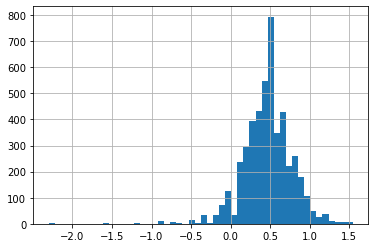

In [38]:
usgs_tn.log_mag.hist(bins=50);

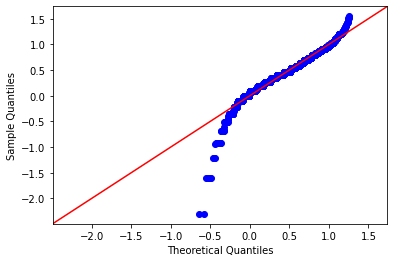

In [41]:
qq_plot(usgs_tn.log_mag)

In [ ]:
# # Obtain Mean and Standard Dev and apply log 
# mu = np.mean(usgs_tn.mag.apply(np.log))
# sigma = np.std(usgs_tn.mag.apply(np.log))

# print('mu = {}'.format(mu))
# print('sigma = {}'.format(sigma))

In [ ]:
# x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)
# plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
# usgs_tn.depth.apply(np.log).hist(density = True);

In [ ]:
# # Your code here
# norm.cdf(x = np.log(45.3592), loc = 4.4782, scale = .2353)

In [ ]:
# # Your code here
# 1 - norm.cdf(x = np.log(136.078), loc = mu, scale = sigma)